In [3]:
!pip install keras

In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [5]:
train_path="cat-dog-dataset/train"
test_path="cat-dog-dataset/test"
val_path="cat-dog-dataset/val"

In [6]:
import os
import cv2
x_train=[]
for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(64,64))
        x_train.append(img_arr)

In [7]:
image_path

'cat-dog-dataset/train/dog/dog.999.jpg'

In [8]:
x_test=[]
for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(64,64))
        x_test.append(img_arr)

In [9]:
x_val=[]
for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(64,64))
        x_val.append(img_arr)

In [10]:
# Import the NumPy module
import numpy as np
# Convert the lists into NumPy arrays
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [11]:
test_x=test_x/255.0

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory(train_path,target_size
= (64, 64), batch_size = 32, class_mode = 'sparse')

Found 5003 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory(test_path, target_size =
(64, 64), batch_size = 32, class_mode = 'sparse')

Found 1600 images belonging to 2 classes.


In [15]:
val_set = val_datagen.flow_from_directory(val_path, target_size = (64,
64), batch_size = 32, class_mode = 'sparse')

Found 400 images belonging to 2 classes.


In [16]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [17]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape
labels = {value: key for key, value in
training_set.class_indices.items()}
print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : cat
1 : dog


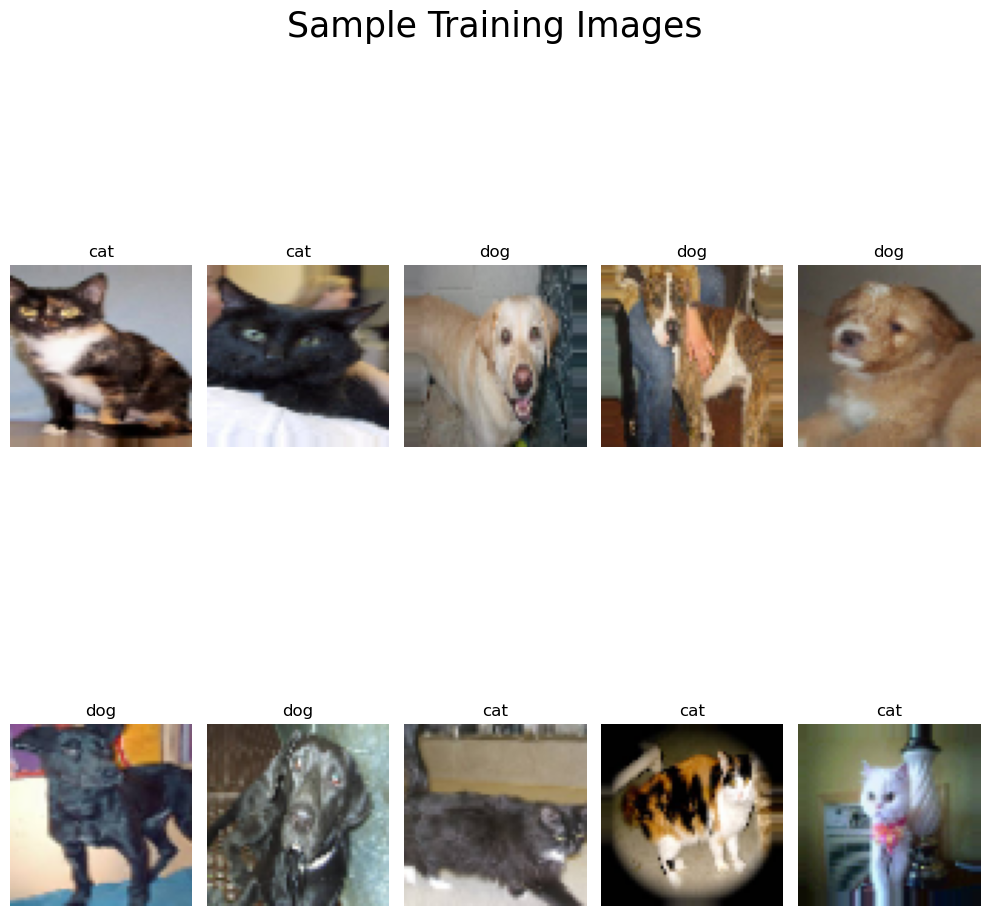

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 12))
idx = 0
for i in range(2):
    for j in range(5):
        #label = labels[np.argmax(training_set[0][1][idx])]
        label = labels[training_set[0][1][idx]]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(training_set[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1
plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=25)
plt.show()

In [19]:
#Build the model
import tensorflow as tf
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.InputLayer(shape=[64, 64, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=5, kernel_size=3,
activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,
activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=2, activation='softmax'))
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 5)      │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 5)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 804,814 (3.07 MB)

 Trainable params: 804,814 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
cnn.compile(optimizer = 'adam', loss =
'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [21]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
early_stopping_monitor = EarlyStopping(monitor='val_loss', mode='min',
verbose=1, patience=5)
#Early stopping to avoid overfitting of model

In [22]:
# Define model checkpoint callback
model_file = 'best_cnn_model.keras'
model_check_point = ModelCheckpoint(model_file, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Fit the model
history = cnn.fit(
    training_set,
    validation_data=val_set,
    epochs=10,
    callbacks=[early_stopping_monitor, model_check_point],
    batch_size=32,
    shuffle=True
)

Epoch 1/10


C:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.5541 - loss: 0.6851
Epoch 1: val_loss improved from inf to 0.69106, saving model to best_cnn_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 149ms/step - accuracy: 0.5544 - loss: 0.6850 - val_accuracy: 0.5425 - val_loss: 0.6911
Epoch 2/10
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.6235 - loss: 0.6523
Epoch 2: val_loss improved from 0.69106 to 0.62290, saving model to best_cnn_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 150ms/step - accuracy: 0.6235 - loss: 0.6523 - val_accuracy: 0.6800 - val_loss: 0.6229
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.6491 - loss: 0.6182
Epoch 3: val_loss improved from 0.62290 to 0.58734, saving model to best_cnn_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 149ms/step - accuracy: 0.6492 - loss: 0.6181 - val_accuracy: 0.6850 - val_loss: 0.5873
Epoch 4/10
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.6992 - loss: 0.5789
Epoch 4: val_loss did not improve fr

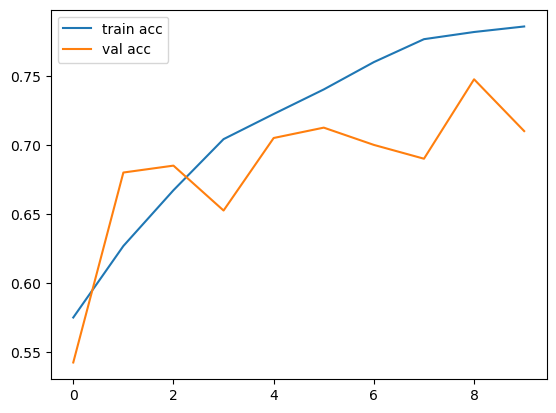

In [23]:
# Import the necessary modules
import matplotlib.pyplot as plt
# Plot the accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

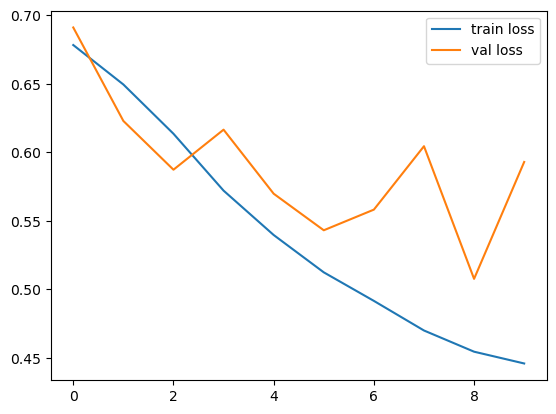

In [24]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [25]:
from keras.models import load_model
model = load_model('best_cnn_model.keras')
# Evaluate the model on the test data
model.evaluate(test_set, batch_size=32)

50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.7486 - loss: 0.5121


[0.5059659481048584, 0.7512500286102295]

In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred, test_y))
#get confusion matrix
print(confusion_matrix(y_pred,test_y))


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

           0       0.72      0.75      0.74       771
           1       0.76      0.73      0.75       829

    accuracy                           0.74      1600
   macro avg       0.74      0.74      0.74      1600
weighted avg       0.74      0.74      0.74      1600

[[578 193]
 [222 607]]


In [27]:
predictions = model.predict(test_x)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


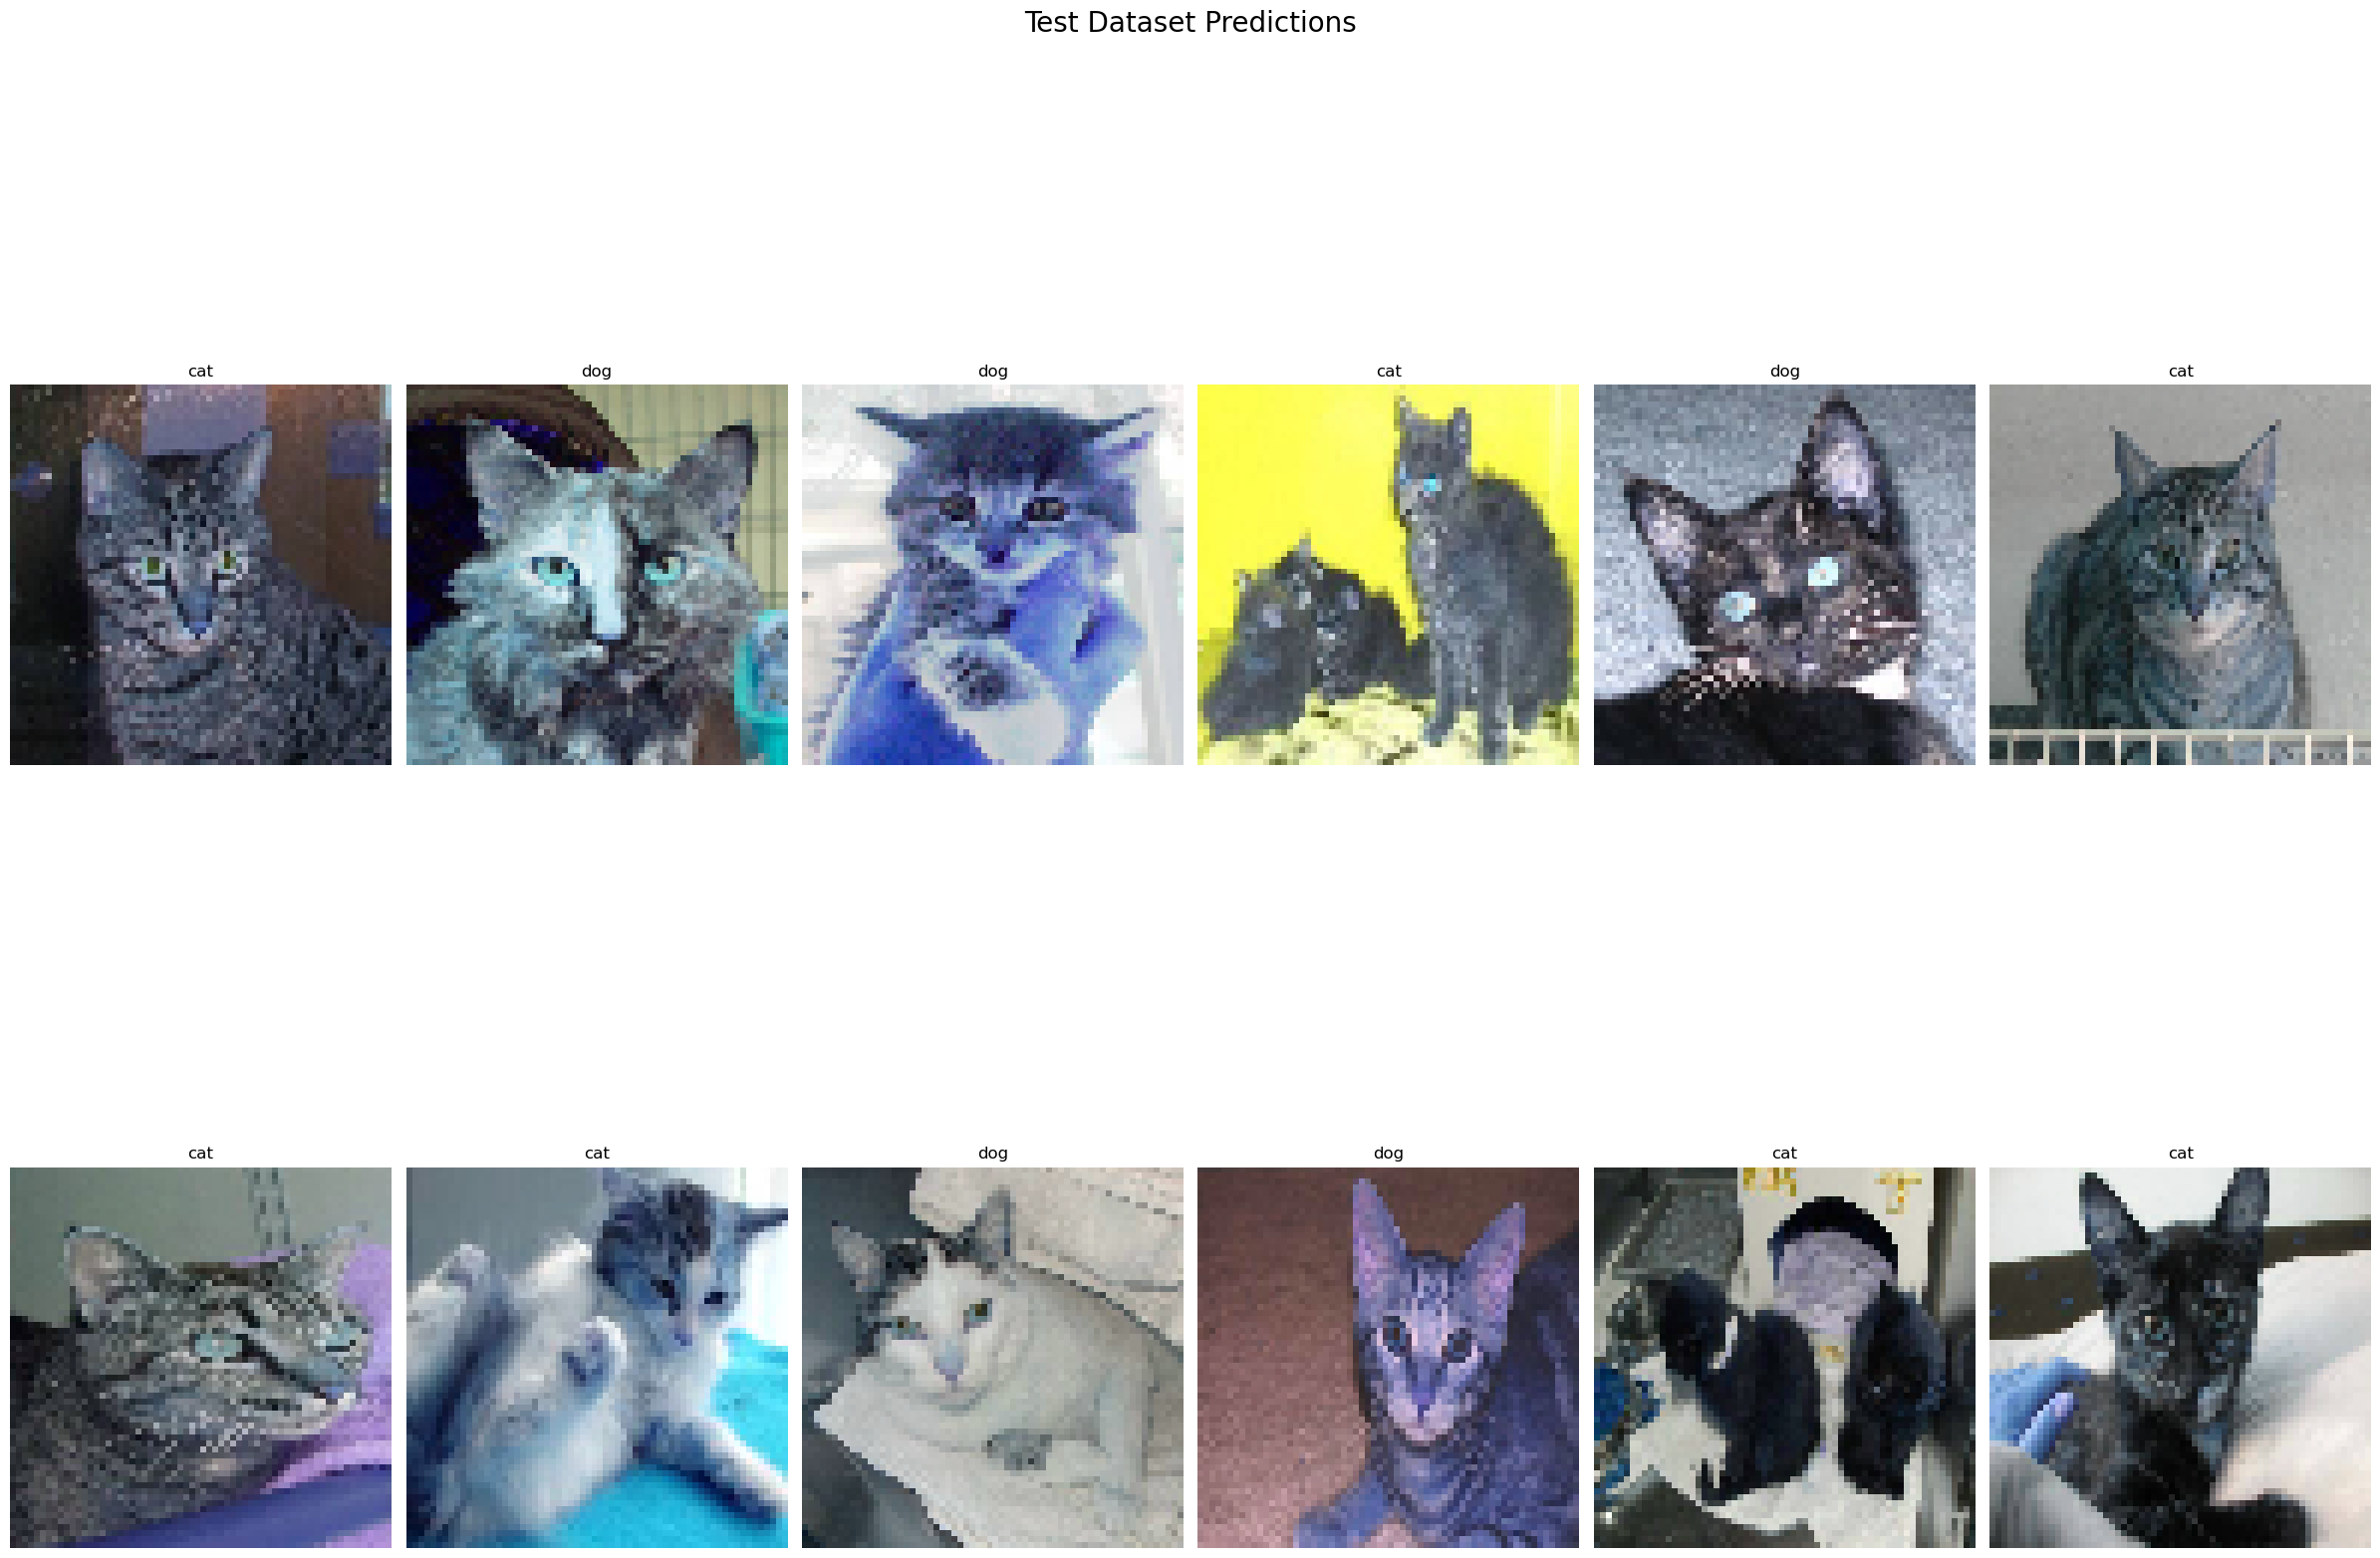

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(24, 20))
idx = 0
for i in range(2):
    for j in range(6):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_x[idx])
        ax[i, j].axis("off")
        idx += 1
plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()